In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import tensorflow as tf
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image


## split dataset into train and test 


In [7]:

# Path to the main dataset folder
main_folder = "cell_images"

# Path to the Parasitized and Uninfected folders
parasitized_folder = os.path.join(main_folder, "Parasitized")
uninfected_folder = os.path.join(main_folder, "Uninfected")

# Create train and test folders within 'cell_images'
train_folder = os.path.join(main_folder, "train")
test_folder = os.path.join(main_folder, "test")
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
# Function to move images to train and test folders
def move_images(source_folder, destination_folder, images):
    for image in images:
        shutil.move(
            os.path.join(source_folder, image), os.path.join(destination_folder, image)
        )

# Get list of images in Parasitized folder
parasitized_images = os.listdir(parasitized_folder)
# Get list of images in Uninfected folder
uninfected_images = os.listdir(uninfected_folder)

# Splitting the dataset into train and test (80-20 split)
parasitized_train, parasitized_test = train_test_split(
    parasitized_images, test_size=0.2, random_state=42
)
uninfected_train, uninfected_test = train_test_split(
    uninfected_images, test_size=0.2, random_state=42
)

# Move images to train and test folders within 'cell_images'
move_images(
    parasitized_folder, os.path.join(train_folder, "Parasitized"), parasitized_train
)
move_images(
    parasitized_folder, os.path.join(test_folder, "Parasitized"), parasitized_test
)
move_images(
    uninfected_folder, os.path.join(train_folder, "Uninfected"), uninfected_train
)
move_images(uninfected_folder, os.path.join(test_folder, "Uninfected"), uninfected_test)


In [10]:
# Total parasitized images for Train set
len(os.listdir("cell_images/train/Parasitized/"))


11024

In [11]:
# Total Uninfected images for Train set
len(os.listdir("cell_images/train/Uninfected"))


11024

In [12]:
# Total Uninfected images for Test set
len(os.listdir("cell_images/test/Uninfected"))


2756

In [13]:
# Total parasitized images for Test set
len(os.listdir("cell_images/test/Parasitized/"))


2756

In [22]:
dim1 = []
dim2 = []

for image_filename in os.listdir("cell_images/train/Uninfected/"):
    img = imread("cell_images/train/Uninfected/" + image_filename)
    d1, d2, colors = img.shape
    dim1.append(d1)
    dim2.append(d2)


In [23]:
np.mean(dim2)

131.13969521044993

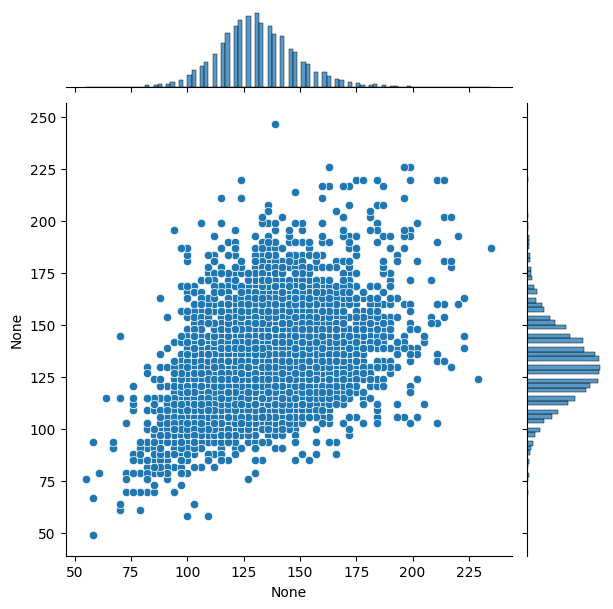

In [24]:
sns.jointplot(x=dim1, y=dim2)

In [2]:
input_shape = (130, 130, 3)

In [3]:
# Image Preprocessing or Image Data Augmentation
image_gen = ImageDataGenerator(
    rotation_range=20,  # rotate the image 20 degrees
    width_shift_range=0.1,  # Shift the pic width by a max of 5%
    height_shift_range=0.1,  # Shift the pic height by a max of 5%
    rescale=1 / 255,  # Rescale the image by normalzing it.
    shear_range=0.1,  # Shear means cutting away part of the image (max 10%)
    zoom_range=0.1,  # Zoom in by 10% max
    horizontal_flip=True,  # Allo horizontal flipping
    fill_mode="nearest",  # Fill in missing pixels with the nearest filled value
)


### Step 1: Create a Model

In [4]:
model = Sequential()
model.add(
    Conv2D(filters=32, kernel_size=(3, 3), input_shape=input_shape, activation="relu")
)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=input_shape, activation="relu")
)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(
    Conv2D(filters=64, kernel_size=(3, 3), input_shape=input_shape, activation="relu")
)
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()


e:\AI Projects\CNN\venv-cnn\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
input_shape[:2]

(130, 130)

### Step 2: Create Image Data Generator

In [6]:
data_dir = "cell_images"
test_path = data_dir + "/test/"
train_path = data_dir + "/train/"


In [7]:
# Step 2: Create Image Data Generator
train_image_gen = image_gen.flow_from_directory(
    train_path,
    target_size=input_shape[:2],
    color_mode="rgb",
    batch_size=16,
    class_mode="binary",
)

test_image_gen = image_gen.flow_from_directory(
    test_path,
    target_size=input_shape[:2],
    color_mode="rgb",
    batch_size=16,
    class_mode="binary",
    shuffle=False,
)


Found 22048 images belonging to 2 classes.
Found 5510 images belonging to 2 classes.


In [8]:
test_image_gen.class_indices

{'Parasitized': 0, 'Uninfected': 1}

In [9]:
# Step 3: Early Stopping
early_stop = EarlyStopping(monitor="val_loss", patience=2)


In [10]:
# Step 4: Fit the Model
results = model.fit(
    train_image_gen, epochs=20, validation_data=test_image_gen, callbacks=[early_stop]
)


Epoch 1/20


e:\AI Projects\CNN\venv-cnn\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1378/1378 ━━━━━━━━━━━━━━━━━━━━ 962s 658ms/step - accuracy: 0.5433 - loss: 0.6876 - val_accuracy: 0.8247 - val_loss: 0.4348
Epoch 2/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 420s 304ms/step - accuracy: 0.9085 - loss: 0.2701 - val_accuracy: 0.9309 - val_loss: 0.2288
Epoch 3/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 1151s 835ms/step - accuracy: 0.9266 - loss: 0.2252 - val_accuracy: 0.9359 - val_loss: 0.1992
Epoch 4/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 883s 639ms/step - accuracy: 0.9363 - loss: 0.2000 - val_accuracy: 0.9437 - val_loss: 0.1941
Epoch 5/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 1048s 755ms/step - accuracy: 0.9442 - loss: 0.1826 - val_accuracy: 0.9379 - val_loss: 0.1954
Epoch 6/20
1378/1378 ━━━━━━━━━━━━━━━━━━━━ 656s 474ms/step - accuracy: 0.9471 - loss: 0.1704 - val_accuracy: 0.9298 - val_loss: 0.2129


In [55]:
df = pd.DataFrame(model.history.history)

<Axes: >

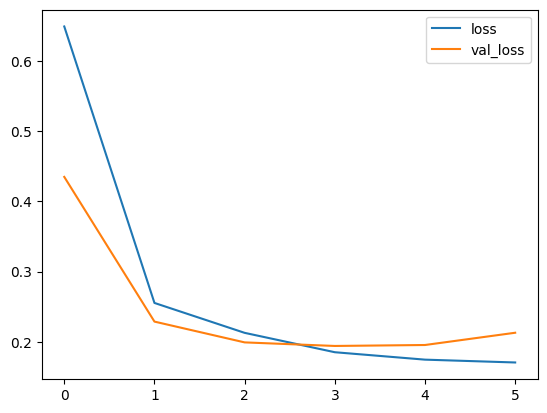

In [13]:
df[["loss", "val_loss"]].plot()

<Axes: >

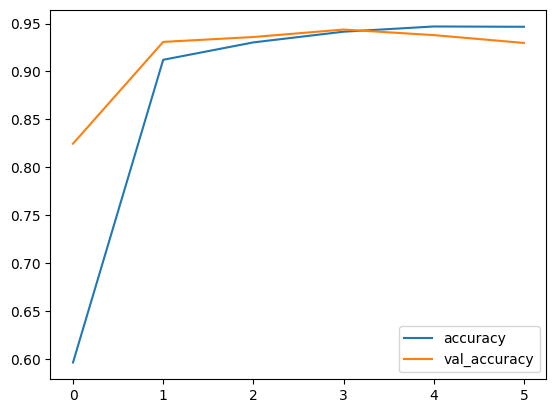

In [14]:
df[["accuracy", "val_accuracy"]].plot()

In [11]:
# Step 5: Save the Model
model.save("malaria_detector.h5")


In [15]:
# Evaluate the model on test set 
test_loss,test_accuracy=model.evaluate(test_image_gen)
print("test_loss",test_loss)
print("Test_accuracy",test_accuracy)

345/345 ━━━━━━━━━━━━━━━━━━━━ 129s 364ms/step - accuracy: 0.9433 - loss: 0.1473
test_loss 0.21318386495113373
Test_accuracy 0.9315789341926575


In [38]:
# Load the model
model = tf.keras.models.load_model("malaria_detector.h5")


In [57]:
import cv2


def preprocess_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (130, 130))
    img_array = img.astype("float32") / 255  # Normalize the image
    img_array = np.expand_dims(img_array, axis=0)
    return img_array


def predict_image(image_path):
    img_array = preprocess_image(image_path)
    prediction = model.predict(img_array)
    prediction_score = prediction[0][0]  # Get the prediction score for the first class
    if prediction_score > 0.5:
        accuracy = prediction_score * 100
        return "Uninfected", prediction_score, accuracy

    else:
        accuracy = (1 - prediction_score) * 100
        return "Parasitized", prediction_score,accuracy


In [60]:
# image_path = "cell_images/test/Parasitized/C59P20thinF_IMG_20150803_113809_cell_42.png"
image_path = (
    "cell_images/test/Uninfected/C64P25N_ThinF_IMG_20150818_153517_cell_130.png"
)
predicted_class, prediction_score, accuracy = predict_image(image_path)
print("Predicted Class:", predicted_class)
# print("Prediction Score:", prediction_score)
print("Accuracy:", accuracy)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
Predicted Class: Uninfected
Accuracy: 96.7903196811676


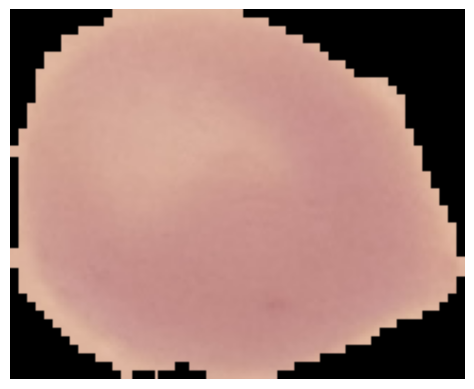

In [61]:
img = cv2.imread(image_path)
# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")  # Turn off axis
plt.show()
